# Spam Email

 * Machine learning can be used to automatically identify and classify spam emails, thereby mitigating these issues.
 * By using spam email in machine learning, we can develop algorithms that can learn to automatically identify and classify spam    emails.
 * These algorithms can be used to filter out spam emails from the user's inbox, saving time and reducing the risk of security      breaches.

In [1]:
# Importing the libraries
import pandas as pd

In [2]:
# To read excel file
df=pd.read_excel("D:\DATA SCIENCE\ML\Practice ML\Spam email.xlsx")
df

,Category,Message
0,ham,&lt;#&gt; %of pple marry with their lovers... ...
1,ham,"&lt;#&gt; , that's all? Guess that's easy enough"
2,ham,"&lt;#&gt; is fast approaching. So, Wish u a ve..."
3,ham,(And my man carlos is definitely coming by mu ...
4,ham,(I should add that I don't really care and if ...
...,...,...
5567,spam,Your B4U voucher w/c 27/03 is MARSMS. Log onto...
5568,spam,Your credits have been topped up for http://ww...
5569,spam,Your next amazing xxx PICSFREE1 video will be ...
5570,spam,Your unique user ID is 1172. For removal send ...


In [3]:
# To check shape of dataframe
df.shape

(5572, 2)

In [4]:
#  ham and spam replace with 0 & 1
df['Category'].replace({'ham':0,'spam':1},inplace = True)
df.head()

,Category,Message
0,0,&lt;#&gt; %of pple marry with their lovers... ...
1,0,"&lt;#&gt; , that's all? Guess that's easy enough"
2,0,"&lt;#&gt; is fast approaching. So, Wish u a ve..."
3,0,(And my man carlos is definitely coming by mu ...
4,0,(I should add that I don't really care and if ...


In [5]:
# To convert message column in string
df['Message'] = df['Message'].apply(lambda x : str(x))

In [6]:
df['Message'][0]

'&lt;#&gt; %of pple marry with their lovers... becz they hav gud undrstndng dat avoids problems. i sent dis 2 u, u wil get gud news on friday by d person you like. And tomorrow will be the best day of your life. Dont break this chain. If you break you will suffer. send this to &lt;#&gt; frnds in &lt;#&gt; mins whn u read...'

In [7]:
# To append message column in list format
[str(x)for x in df['Message']]

['&lt;#&gt; %of pple marry with their lovers... becz they hav gud undrstndng dat avoids problems. i sent dis 2 u, u wil get gud news on friday by d person you like. And tomorrow will be the best day of your life. Dont break this chain. If you break you will suffer. send this to &lt;#&gt; frnds in &lt;#&gt; mins whn u read...',
 "&lt;#&gt; , that's all? Guess that's easy enough",
 "&lt;#&gt; is fast approaching. So, Wish u a very Happy New Year Happy Sankranti Happy republic day Happy Valentines Day Happy Shivratri Happy Ugadi Happy Fools day Happy May Day Happy Independence Day, Happy Friendship,Mother,Father,Teachers,Childrens Day, &amp; HAPPY BIRTHDAY 4 U. Happy Ganesh festival Happy Dasara Happy Diwali Happy Christmas &lt;#&gt; Good Mornings Afternoons, Evenings Nights. RememberI AM the first to WISHING U ALL THESE...your's Raj",
 '(And my man carlos is definitely coming by mu tonight, no excuses)',
 "(I should add that I don't really care and if you can't I can at least get this du

In [8]:
X = df['Message']
y= df['Category']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
# To check X_train.shape
X_train.shape
print("X_train shape = ",X_train.shape)

# To check X_test.shape
X_test.shape
print("X_test shape = ",X_test.shape)

X_train shape =  (4457,)
X_test shape =  (1115,)


Count Vectorizer - Count Vectorizer is method to convert text to                         numerical data(To count word in sentance)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [14]:
X_train_vect = vectorizer.fit_transform(X_train)
X_train_vect

<4457x7768 sparse matrix of type '<class 'numpy.int64'>'
	with 59090 stored elements in Compressed Sparse Row format>

In [16]:
# To check a shape convert into array
X_train_vect.toarray().shape

(4457, 7768)

In [15]:
# To see how look like in array
X_train_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
# Try to check how the prediction work in BernoulliNB
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train_vect,y_train)

BernoulliNB()

* It is applying the 'transform' method of the 'vectorizer' object to the data in 'X_test' and storing the resulting numerical
  vectors in a new variable called 'X_test_vect'
*  The transformed data can then be used as input to machine learning models or other algorithms that require numerical input.    

In [18]:
X_test_vect = vectorizer.transform(X_test)
X_test_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
# To check score in BernoulliNB
model.score(X_test_vect,y_test)
print("BernoulliNB score = ",model.score(X_test_vect,y_test))

BernoulliNB score =  0.979372197309417


In [37]:
emails = ['Yup... From what i remb... I think should be can book...',
'09066362231 URGENT! Your mobile No 07xxxxxxxxx won a œ2,000 bonus caller prize on 02/06/03! this is the 2nd attempt to reach YOU! call 09066362231 ASAP!',
'0A$NETWORKS allow companies to bill for SMS, so they are responsible for their "suppliers", just as a shop has to give a guarantee on what they sell. B. G.']

In [21]:
emails_vect = vectorizer.transform(emails)

In [22]:
# To check prediction of email work is right 
model.predict(emails_vect)

array([0, 1, 1], dtype=int64)

In [23]:
# Try to check how the prediction work in BernoulliNB
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train_vect,y_train)

BernoulliNB()

In [24]:
# Try to check how the prediction work in MultinomialNB
from sklearn.naive_bayes import MultinomialNB
mb = MultinomialNB()
mb.fit(X_train_vect,y_train)

MultinomialNB()

In [25]:
mb.predict(emails_vect)

array([0, 1, 1], dtype=int64)

In [39]:
mb.score(X_test_vect,y_test)
print("MultinomialNB score = ",mb.score(X_test_vect,y_test))

MultinomialNB score =  0.9847533632286996




* Pipeline - 
    fit method are already available in Pipeline means they use atomatical

In [27]:
from sklearn.pipeline import Pipeline

In [28]:
# In one line collect more than one step and models
clf = Pipeline([('vectorizer' ,CountVectorizer()) ,('mb' ,MultinomialNB())])
clf

Pipeline(steps=[('vectorizer', CountVectorizer()), ('mb', MultinomialNB())])

In [29]:
# To fit clf model
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('mb', MultinomialNB())])

In [40]:
# To check clf score
clf.score(X_test,y_test)
print("clf score = ",clf.score(X_test,y_test))

clf score =  0.9847533632286996


In [31]:
y_pred = clf.predict(X_test)

In [32]:
clf.predict(emails)

array([0, 1, 1], dtype=int64)

* Confusion matrix

In [33]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

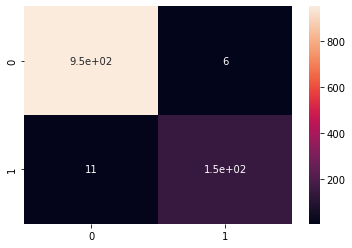

In [34]:
cm = confusion_matrix(y_test,y_pred)
import seaborn as sns 
sns.heatmap(cm,annot = True)